In [173]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# enter your own credentials
google_username = "gmail"
google_password = "password"
%matplotlib inline

## Result and Conclusion

In this project, we try to guess quantity of sales and product groups sold.

By using google trends api, we look for the keywords that are trending. And by using log differences, we inference that at spesific times, some terms show upward trending. We basically used this naive approach. 

In [151]:
# Date column should be like 2015.01.15
data = pd.read_csv('InventoryPosition.csv',delimiter=';')

Date              object
StoreCode         object
ProductCode       object
SalesQuantity      int64
StoreStock         int64
IncomingStock      int64
SalesRevenue     float64
dtype: object

In [227]:
data_array = np.array(data)[:,:-2]
data['ProductPrice'] = (data['SalesRevenue']/data['SalesQuantity']).round(2)
d = data.groupby(["StoreCode","ProductCode","Date", "ProductPrice"]).size()
a = data_array
a = a[a[:,0].argsort()] 
ind = np.where(a[:,3] > 0)
a = a[ind,:][0]
n = a.shape[0]
x = [dt.datetime.strptime(d,'%Y.%m.%d').date() for d in a[:,0]]
a[:,0] = x
d

StoreCode  ProductCode  Date        ProductPrice
Store1     Product1     2015.04.14  157.04          1
                        2015.05.14  157.04          1
                        2015.06.06  111.27          1
                        2015.06.27  79.70           1
                        2015.08.01  79.70           1
                        2015.08.09  48.93           1
                        2015.08.17  48.93           1
                        2015.08.19  48.93           1
                        2015.08.26  48.93           1
           Product10    2015.03.26  230.30          1
                        2015.03.31  230.30          1
                        2015.04.02  230.30          1
                        2015.04.09  230.30          1
                        2015.04.10  230.30          1
                        2015.04.14  230.30          1
                        2015.04.19  230.30          1
                        2015.04.20  230.30          1
                        2015.04.2

In [228]:
#d = data.groupby(["ProductCode","Date","StoreCode", "ProductPrice"]).size()
pg = pd.read_csv('Products.csv',delimiter='|')
pgarr = np.array(pg)
pgs = {'PG1': [], 'PG2': [],'PG3':[],'PG4':[],'PG5':[]}
pgsT = {'PG1': [], 'PG2': [],'PG3':[],'PG4':[],'PG5':[]}
for i in range(n):
    pn = a[i,2]
    ind = np.where(pgarr == pn)[0]
    pg = pgarr[ind,1][0]
    pgs[pg].append(a[i,3])
    pgsT[pg].append(a[i,0])


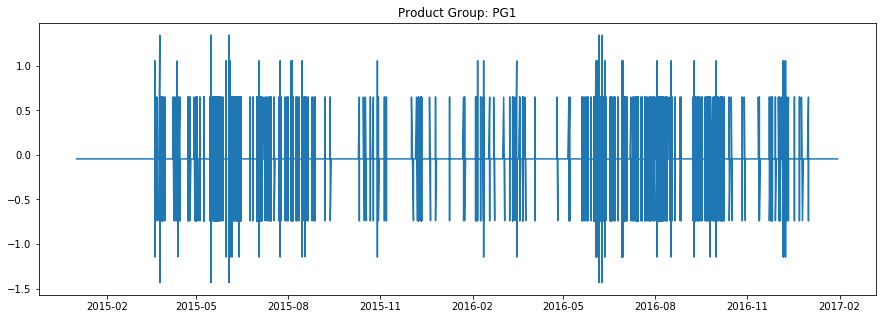

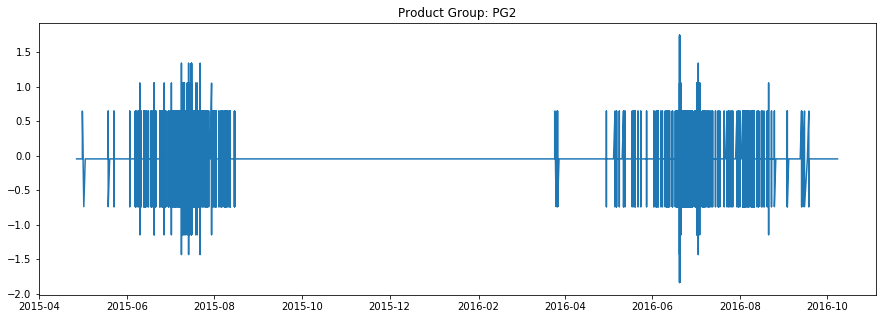

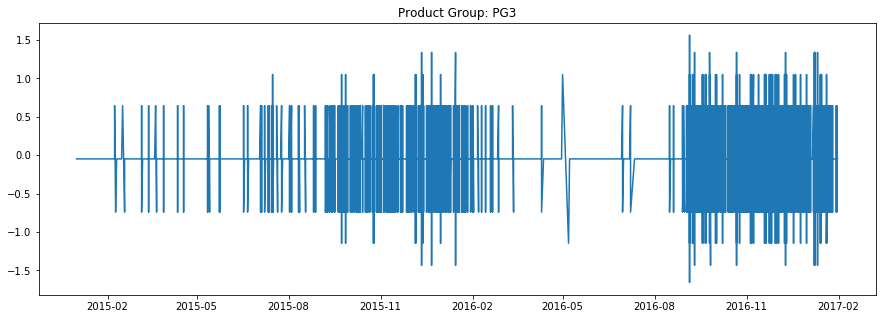

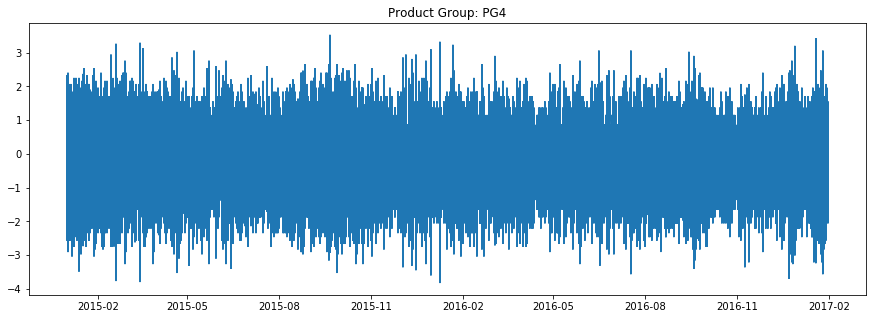

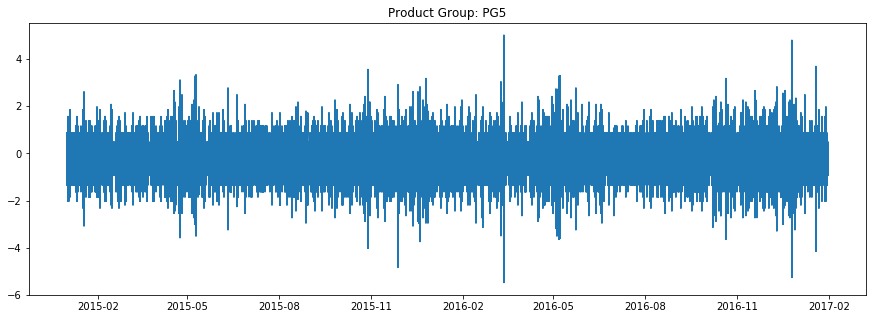

In [229]:
for pgObj in pgs:
    dateList = pgsT[pgObj]
    p=pgs[pgObj]
    m = np.mean(np.log(p))
    p = [np.log(p[x])-np.log(p[x-1])-m for x in range(len(p))]
    plt.figure(figsize=(15,5))
    plt.title('Product Group: '+ pgObj)
    plt.plot(dateList,p)
    plt.show()


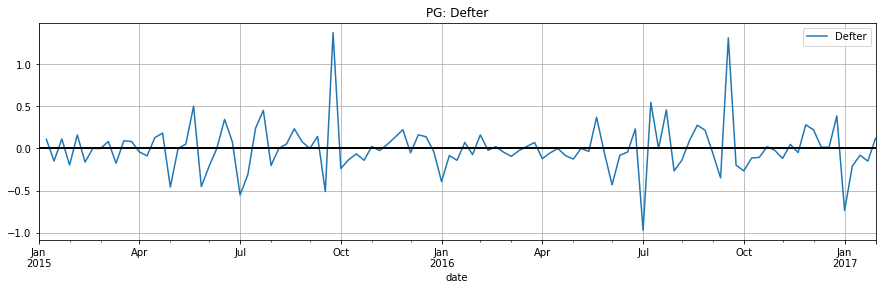

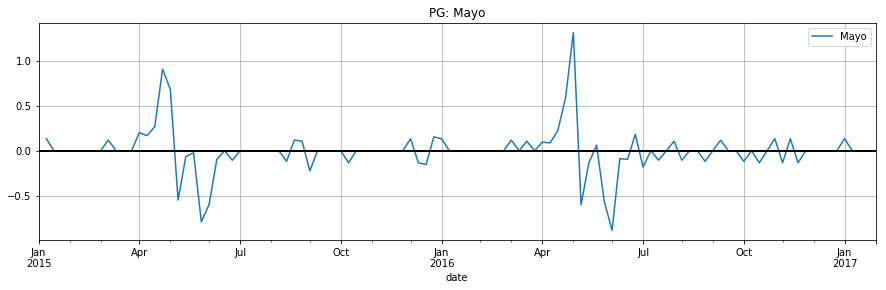

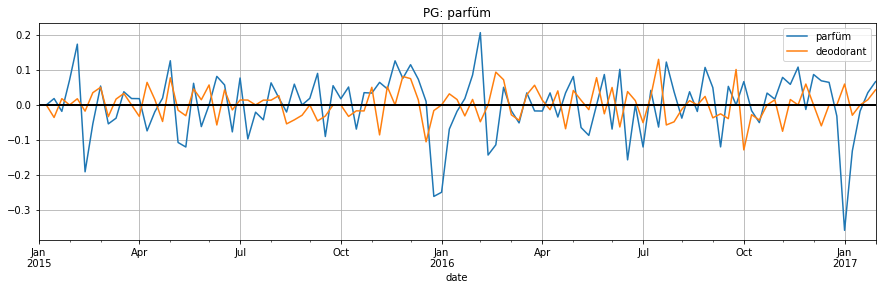

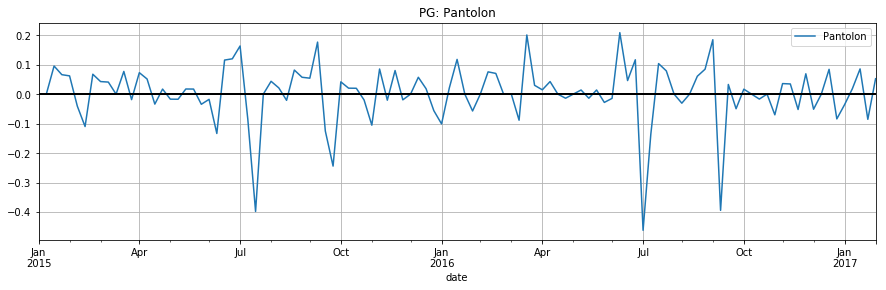

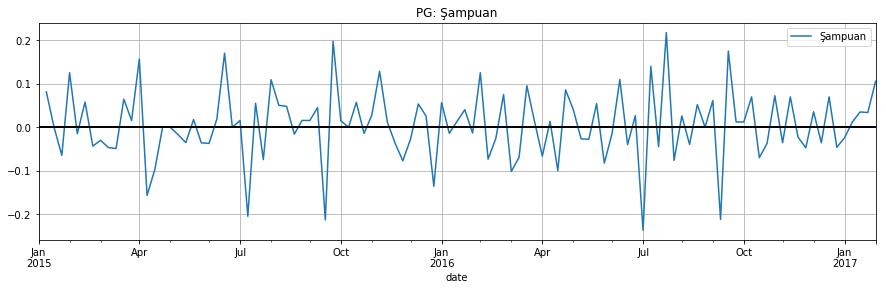

In [217]:
import requests
from pytrends.request import TrendReq


path = "https://trends.google.com.tr/trends/explore?geo=TR"

# Login to Google. Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq(google_username, google_password, custom_useragent='My Pytrends Script')
kw_list = [['Defter'],['Mayo'],['parfüm','deodorant'],['Pantolon'],['Şampuan']] # You can give different keywords by typing
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
for key_list in kw_list:
    pytrend.build_payload(kw_list=key_list,timeframe='2015-1-1 2017-01-31')
    # Interest Over Time
    interest_over_time_df = pytrend.interest_over_time()
    interest_over_time_df = interest_over_time_df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
    interest_over_time_df.plot(grid = True,title='PG: '+key_list[0],figsize=(15, 4)).axhline(y = 0, color = "black", lw = 2)
   
